In [1]:
import numpy as np
import pandas as pd

In [2]:
iris = pd.read_csv("datasets/iris/iris.csv")
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = iris.drop('Species', axis=1)

In [4]:
y = iris['Species']

In [5]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
# Tenemos un problema de clasificación múltiple
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()

In [7]:
# Vamos a cambiar nuestro array con los labels a 'one-hot-encoder'
y = encoder.fit_transform(y)
# Mostramos los 5 primeros. Hemos convertido las especies 'setosa', 'versicolor', 'virginica'
y[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [8]:
# Train and test split y creación de un Scaler para los datos.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Creación de un Scaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [11]:
# Ahora transformamos los datos de train y test
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [12]:
# Tengamos en cuenta que tenemos que guardar el objeto scaler para poder luego utilizarlo en procesos sucesivos

In [13]:
# Ahora tenemos que crear la red neuronal con Keras y TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
# Creación del modelo
model = Sequential()
# Capa de entrada
model.add(Dense(units=4, activation='relu', input_shape=[4, ]))
# Capa de salida
model.add(Dense(units=3, activation='softmax'))  # Porque tenemos una función de clasificación múltiple
# Compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Agregación de un early stopping para evitar overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=10)

In [16]:
# Entrenamiento del modelo
model.fit(x=scaled_X_train, y=y_train, epochs=300,
         validation_data=(scaled_X_test, y_test), callbacks=[early_stop])

Epoch 1/300
4/4 [==============================] - 0s 36ms/step - loss: 1.1472 - accuracy: 0.3333 - val_loss: 1.1594 - val_accuracy: 0.3333
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 1.1388 - accuracy: 0.3333 - val_loss: 1.1515 - val_accuracy: 0.3333
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 1.1327 - accuracy: 0.3333 - val_loss: 1.1438 - val_accuracy: 0.3333
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 1.1257 - accuracy: 0.3333 - val_loss: 1.1369 - val_accuracy: 0.3333
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 1.1199 - accuracy: 0.3333 - val_loss: 1.1304 - val_accuracy: 0.3333
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 1.1143 - accuracy: 0.3333 - val_loss: 1.1242 - val_accuracy: 0.3333
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 1.1099 - accuracy: 0.3333 - val_loss: 1.1183 - val_accuracy: 0.3333
Epoch 8/300
4/4 [=========

4/4 [==============================] - 0s 3ms/step - loss: 0.9445 - accuracy: 0.5917 - val_loss: 0.9514 - val_accuracy: 0.5667
Epoch 60/300
4/4 [==============================] - 0s 3ms/step - loss: 0.9416 - accuracy: 0.5917 - val_loss: 0.9486 - val_accuracy: 0.5667
Epoch 61/300
4/4 [==============================] - 0s 3ms/step - loss: 0.9387 - accuracy: 0.5917 - val_loss: 0.9458 - val_accuracy: 0.5667
Epoch 62/300
4/4 [==============================] - 0s 3ms/step - loss: 0.9358 - accuracy: 0.5917 - val_loss: 0.9430 - val_accuracy: 0.5667
Epoch 63/300
4/4 [==============================] - 0s 3ms/step - loss: 0.9329 - accuracy: 0.5917 - val_loss: 0.9403 - val_accuracy: 0.5667
Epoch 64/300
4/4 [==============================] - 0s 4ms/step - loss: 0.9302 - accuracy: 0.5917 - val_loss: 0.9375 - val_accuracy: 0.5667
Epoch 65/300
4/4 [==============================] - 0s 3ms/step - loss: 0.9272 - accuracy: 0.5917 - val_loss: 0.9347 - val_accuracy: 0.6000
Epoch 66/300
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 0.7862 - accuracy: 0.6667 - val_loss: 0.7966 - val_accuracy: 0.6333
Epoch 118/300
4/4 [==============================] - 0s 4ms/step - loss: 0.7838 - accuracy: 0.6667 - val_loss: 0.7942 - val_accuracy: 0.6333
Epoch 119/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7814 - accuracy: 0.6667 - val_loss: 0.7918 - val_accuracy: 0.6333
Epoch 120/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7790 - accuracy: 0.6667 - val_loss: 0.7895 - val_accuracy: 0.6333
Epoch 121/300
4/4 [==============================] - 0s 4ms/step - loss: 0.7766 - accuracy: 0.6750 - val_loss: 0.7872 - val_accuracy: 0.6333
Epoch 122/300
4/4 [==============================] - 0s 4ms/step - loss: 0.7743 - accuracy: 0.6750 - val_loss: 0.7849 - val_accuracy: 0.6333
Epoch 123/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7720 - accuracy: 0.6750 - val_loss: 0.7826 - val_accuracy: 0.6333
Epoch 124/300
4/4 [========

4/4 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.6750 - val_loss: 0.6828 - val_accuracy: 0.6333
Epoch 176/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.6750 - val_loss: 0.6813 - val_accuracy: 0.6333
Epoch 177/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6713 - accuracy: 0.6750 - val_loss: 0.6798 - val_accuracy: 0.6333
Epoch 178/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6698 - accuracy: 0.6750 - val_loss: 0.6783 - val_accuracy: 0.6333
Epoch 179/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6684 - accuracy: 0.6750 - val_loss: 0.6768 - val_accuracy: 0.6333
Epoch 180/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.6750 - val_loss: 0.6754 - val_accuracy: 0.6333
Epoch 181/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.6750 - val_loss: 0.6740 - val_accuracy: 0.6333
Epoch 182/300
4/4 [========

4/4 [==============================] - 0s 3ms/step - loss: 0.6066 - accuracy: 0.6750 - val_loss: 0.6140 - val_accuracy: 0.6333
Epoch 234/300
4/4 [==============================] - 0s 4ms/step - loss: 0.6057 - accuracy: 0.6750 - val_loss: 0.6131 - val_accuracy: 0.6333
Epoch 235/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6049 - accuracy: 0.6750 - val_loss: 0.6122 - val_accuracy: 0.6333
Epoch 236/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6040 - accuracy: 0.6750 - val_loss: 0.6114 - val_accuracy: 0.6333
Epoch 237/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6031 - accuracy: 0.6750 - val_loss: 0.6105 - val_accuracy: 0.6333
Epoch 238/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6023 - accuracy: 0.6750 - val_loss: 0.6095 - val_accuracy: 0.6333
Epoch 239/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6014 - accuracy: 0.6750 - val_loss: 0.6086 - val_accuracy: 0.6333
Epoch 240/300
4/4 [========

4/4 [==============================] - 0s 3ms/step - loss: 0.5626 - accuracy: 0.6750 - val_loss: 0.5694 - val_accuracy: 0.6333
Epoch 292/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5618 - accuracy: 0.6750 - val_loss: 0.5687 - val_accuracy: 0.6333
Epoch 293/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5611 - accuracy: 0.6750 - val_loss: 0.5680 - val_accuracy: 0.6333
Epoch 294/300
4/4 [==============================] - 0s 4ms/step - loss: 0.5604 - accuracy: 0.6750 - val_loss: 0.5673 - val_accuracy: 0.6333
Epoch 295/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5596 - accuracy: 0.6750 - val_loss: 0.5666 - val_accuracy: 0.6333
Epoch 296/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5589 - accuracy: 0.6750 - val_loss: 0.5659 - val_accuracy: 0.6333
Epoch 297/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5582 - accuracy: 0.6750 - val_loss: 0.5652 - val_accuracy: 0.6333
Epoch 298/300
4/4 [========

In [17]:
# Estudiemos las métricas
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.147242,0.333333,1.159443,0.333333
1,1.138818,0.333333,1.151510,0.333333
2,1.132742,0.333333,1.143791,0.333333
3,1.125677,0.333333,1.136894,0.333333
4,1.119872,0.333333,1.130350,0.333333
...,...,...,...,...
295,0.558922,0.675000,0.565875,0.633333
296,0.558191,0.675000,0.565184,0.633333
297,0.557400,0.675000,0.564403,0.633333
298,0.556653,0.675000,0.563624,0.633333


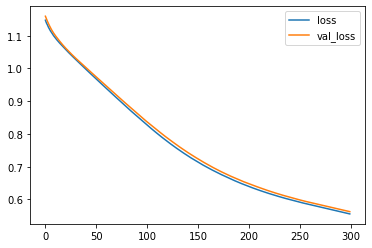

In [18]:
# Dibujemos en un gráfico las funciones loss y val_loss
metrics[['loss', 'val_loss']].plot()

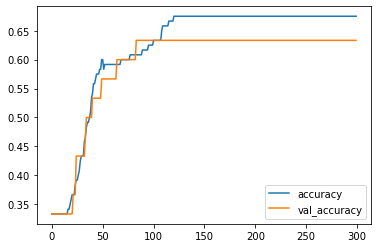

In [19]:
# Dibujemos en un gráfico las funciones accuracy y val_accuracy
metrics[['accuracy', 'val_accuracy']].plot()

In [20]:
# Evaluación del modelo
model.evaluate(scaled_X_test, y_test, verbose=0) # Lo que obtendremos es el final_loss y el final_accuracy

[0.5628907084465027, 0.6333333253860474]

In [21]:
# Aquí es el punto en el que tenemos que decidir si estas métricas son lo suficientemente buenas
# Hemos obtenido el 80% de precisión. ¿Es suficiente? -> Sí, entonces ...
# Preparemos nuestro modelo para el deployment.
# Lo que quiero es conseguir el mejor modelo posible. Para ello, utilizo ahora todos los datos.
# Voy a aplicar nuestro Scaler a todos los datos
scaled_X = scaler.fit_transform(X)

In [22]:
# Creamos ahora un nuevo modelo usando todos los datos
model = Sequential()
model.add(Dense(units=4, activation='relu', input_shape=[4, ]))
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(scaled_X, y, epochs=300)

Epoch 1/300
5/5 [==============================] - 0s 708us/step - loss: 1.0514 - accuracy: 0.6667
Epoch 2/300
5/5 [==============================] - 0s 574us/step - loss: 1.0497 - accuracy: 0.6667
Epoch 3/300
5/5 [==============================] - 0s 556us/step - loss: 1.0480 - accuracy: 0.4000
Epoch 4/300
5/5 [==============================] - 0s 653us/step - loss: 1.0465 - accuracy: 0.3333
Epoch 5/300
5/5 [==============================] - 0s 505us/step - loss: 1.0449 - accuracy: 0.3333
Epoch 6/300
5/5 [==============================] - 0s 568us/step - loss: 1.0433 - accuracy: 0.3333
Epoch 7/300
5/5 [==============================] - 0s 543us/step - loss: 1.0416 - accuracy: 0.3333
Epoch 8/300
5/5 [==============================] - 0s 588us/step - loss: 1.0399 - accuracy: 0.3333
Epoch 9/300
5/5 [==============================] - 0s 446us/step - loss: 1.0382 - accuracy: 0.3333
Epoch 10/300
5/5 [==============================] - 0s 672us/step - loss: 1.0364 - accuracy: 0.3333
Epoch 11/

5/5 [==============================] - 0s 518us/step - loss: 0.8554 - accuracy: 0.6667
Epoch 84/300
5/5 [==============================] - 0s 486us/step - loss: 0.8529 - accuracy: 0.6667
Epoch 85/300
5/5 [==============================] - 0s 469us/step - loss: 0.8503 - accuracy: 0.6667
Epoch 86/300
5/5 [==============================] - 0s 555us/step - loss: 0.8478 - accuracy: 0.6667
Epoch 87/300
5/5 [==============================] - 0s 537us/step - loss: 0.8453 - accuracy: 0.6667
Epoch 88/300
5/5 [==============================] - 0s 516us/step - loss: 0.8428 - accuracy: 0.6667
Epoch 89/300
5/5 [==============================] - 0s 519us/step - loss: 0.8404 - accuracy: 0.6667
Epoch 90/300
5/5 [==============================] - 0s 528us/step - loss: 0.8378 - accuracy: 0.6667
Epoch 91/300
5/5 [==============================] - 0s 508us/step - loss: 0.8354 - accuracy: 0.6667
Epoch 92/300
5/5 [==============================] - 0s 700us/step - loss: 0.8329 - accuracy: 0.6667
Epoch 93/300


5/5 [==============================] - 0s 524us/step - loss: 0.6805 - accuracy: 0.7000
Epoch 165/300
5/5 [==============================] - 0s 654us/step - loss: 0.6788 - accuracy: 0.7000
Epoch 166/300
5/5 [==============================] - 0s 529us/step - loss: 0.6771 - accuracy: 0.7000
Epoch 167/300
5/5 [==============================] - 0s 548us/step - loss: 0.6754 - accuracy: 0.7067
Epoch 168/300
5/5 [==============================] - 0s 641us/step - loss: 0.6737 - accuracy: 0.7067
Epoch 169/300
5/5 [==============================] - 0s 577us/step - loss: 0.6719 - accuracy: 0.7067
Epoch 170/300
5/5 [==============================] - 0s 634us/step - loss: 0.6703 - accuracy: 0.7067
Epoch 171/300
5/5 [==============================] - 0s 521us/step - loss: 0.6686 - accuracy: 0.7067
Epoch 172/300
5/5 [==============================] - 0s 506us/step - loss: 0.6670 - accuracy: 0.7067
Epoch 173/300
5/5 [==============================] - 0s 541us/step - loss: 0.6653 - accuracy: 0.7067
Epoc

5/5 [==============================] - 0s 749us/step - loss: 0.5709 - accuracy: 0.7800
Epoch 245/300
5/5 [==============================] - 0s 599us/step - loss: 0.5700 - accuracy: 0.7800
Epoch 246/300
5/5 [==============================] - 0s 720us/step - loss: 0.5689 - accuracy: 0.7800
Epoch 247/300
5/5 [==============================] - 0s 659us/step - loss: 0.5678 - accuracy: 0.7867
Epoch 248/300
5/5 [==============================] - 0s 603us/step - loss: 0.5668 - accuracy: 0.7800
Epoch 249/300
5/5 [==============================] - 0s 705us/step - loss: 0.5658 - accuracy: 0.7867
Epoch 250/300
5/5 [==============================] - 0s 656us/step - loss: 0.5647 - accuracy: 0.7867
Epoch 251/300
5/5 [==============================] - 0s 1ms/step - loss: 0.5637 - accuracy: 0.7867
Epoch 252/300
5/5 [==============================] - 0s 735us/step - loss: 0.5626 - accuracy: 0.7867
Epoch 253/300
5/5 [==============================] - 0s 636us/step - loss: 0.5616 - accuracy: 0.7867
Epoch 

In [24]:
# Vemos que ahora hemos obtenido una precisión del 97%, es mayor que la obtuvimos antes.
# Pero la que obtuvimos antes es la válida.

In [25]:
# Ahora tenemos que guardar el modelo
model.save("final_iris_model.h5")

In [26]:
# Ahora tenemos que guardar el Scaler
import joblib
joblib.dump(scaler, "iris_scaler.pkl")

['iris_scaler.pkl']

In [27]:
# Predicción sobre una simple flor
from tensorflow.keras.models import load_model

In [28]:
# Cargamos el modelo
flower_model = load_model("final_iris_model.h5")

In [29]:
# Cargamos el scaler
flower_scaler = joblib.load("iris_scaler.pkl")

In [32]:
# Hagamos una predicción. Vamos a crear una función que:
# 1.- Reciba un modelo como parámetro
# 2.- Reciba un scaler como parémtro
# 3.- Reciba unos datos como entrada para clasificar

# Lo común es utilizar el formato json tanto para enviar datos como para obtener la predicción
# Formato para envío de datos a la función de evaluación
flower_example = {
    "sepal_length": 5.1,
    "sepal_width": 3.5,
    "petal_length": 1.4,
    "petal_width": 0.2
}

In [38]:
# Definición de la función

def return_prediction(model, scaler, sample_json):
    
    s_len = sample_json["sepal_length"]
    s_wid = sample_json["sepal_width"]
    p_len = sample_json["petal_length"]
    p_wid = sample_json["petal_width"]
    
    # Composición de las medidas de una simple flor
    flower = [[s_len, s_wid, p_len, p_wid]]
    
    # Como ya hemos cargado el Scaler, lo aplicamos
    flower = scaler.transform(flower)
    
    # Realizamos la predicción
    # Pero antes recordemos el 'encoder' que definimos antes
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    # encoder.classes_ = setosa, versicolor, virginica
    # Con esto obtendremos 0, 1 ó 2. Pero en un array
    # class_ind = model.predict_classes(flower)
    # Para obtener el valor tomo el primer elemento
    class_ind = model.predict_classes(flower)[0]
    
    return classes[class_ind]

In [40]:
# Hagamos la invocación
return_prediction(flower_model, flower_scaler, flower_example)

'setosa'

# CODE FOR DEPLOYMENT

Este será todo el código que necesitemos ejecutar en la aplicación Flask.

In [43]:
from tensorflow.keras.models import load_model
import numpy as np
import joblib

flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")

def return_prediction(model, scaler, sample_json):
    s_len = sample_json["sepal_length"]
    s_wid = sample_json["sepal_width"]
    p_len = sample_json["petal_length"]
    p_wid = sample_json["petal_width"]
    flower = [[s_len, s_wid, p_len, p_wid]]
    flower = scaler.transform(flower)
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    class_ind = model.predict_classes(flower)[0]
    return classes[class_ind]